## Redemption Decay Functions for Reconciliation Estimation

DATASET CONSTRUCTION INFORMATION


This file describes the creation of the initial dataset used to model coupon redemption for Bayer.
Monthly finance reports were provided by Bayer. Each report contained a list of coupons, issue dates,
and redemption numbers. The reports were combined into one large dataset. Only coupons with data
greater than 30 days since issue were included. Three variables, two final and one intermediate, were created.

1. Sum_PERIOD-QTY: contained the sum total of redemptions for each coupon for all periods.
2. Total_Dist_Percent: each period's redemption per coupon divided by the Sum-Period-QTY.
3. Days_Since_Issue: calculated the number of days since coupon issue.

Variables 2 and 3 were used in the Python program.

NOTE: the data provided was monthly. This prevented modeling the first few weeks of any given coupon, meaning coupon forecasting
is only possible after 30 days. Also, after filtering criteria, some coupon types did not have enough samples for accurate modeling,
and were either grouped together by similarity or defaulted to Budget Cost Life.

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from scipy.optimize import curve_fit as cf
from datetime import date

In [2]:
def func(x, a, b):
    """
    This function defines the formula
    That we are optimizing, note that since
    The exponential function (non-normalized)
    "Has two parameters" of interest
    :param x: Percentage completed redemption in one period
    :param a: constant coefficient
    :param b: coefficient for x in the exponent of e
    :return: returns a and b, the best estimates for the curve
    """
    return a * np.exp(-b * (x))

In [3]:
def r_squared(x, y, a, b):
    """
    Calculates r-squared, accurate for fitting best fit line
    :param x: x observations
    :param y: y observations
    :param a: coefficient estimate returned from func
    :param b: coefficient estimate returned from func
    :return: r-squared calculation and printout
    """
    res = y - func(x, a, b)
    ss_r = np.sum(res ** 2)
    ss_tot = np.sum((y - np.mean(y) ** 2))
    r_sq = np.round((1 - (ss_r / ss_tot)), 4)
    print(f'R^2 = {r_sq}')
    print(f'Curve Formula: y={a}*exp^(-{b}*(x)')

In [4]:
def plot_curve(x, y, a, b):
    """
    Converts the existing x and y data and the
    best fit curve parameters a and b to create
    a plot
    :param x:
    :param y:
    :param a:
    :param b:
    :return:
    """
    x_est = np.arange(min(x), max(x))
    y_curve = a*np.exp(-b*x_est)
    plt.figure(figsize=(8,8))
    plt.scatter(x, y, s=12)
    plt.plot(x_est, y_curve, '--', color='red')
    plt.show()

In [5]:
def output(x, y, p0):
    """
    This combines all the functions and
    creates the plot, formula for estimates
    and r-squared
    :param x: x data
    :param y: y data
    :param p0: interval in which the curve-fitting
    function begins its search
    :return: plot of data against estimate, model formula
    estimate, and r-squared
    """
    popt, pcov = cf(func, x, y, p0)
    a = np.round(popt[0], 5)
    b = np.round(popt[1], 5)
    r_squared(x, y, a, b)
    plot_curve(x, y, a, b)
    return a, b

#### Creation of file for Curve Formula
1. Read in the financial data (either monthly or weekly)
2. Calculate the Time Since Issue separately (it will be different for every report)
3. Append all reports
4. Drop all observations with start dates before the issuance of the first report and after the last
5. Using the last cumulative redemption count, divide the observation from each report by number
6. Subtract each reports percentage from 1 to get y-axis values
7. Visualize days since issue on the x-axis and the percentage on the y-axis
8. This scatter plot, separated by offer type, is what the curve fitting portion fits to

In [6]:
os.chdir('C:/Users/norri/DataspellProjects/mercury-ds/attribution/Bayer/')

In [132]:
report_0121 = pd.read_excel('Finance Total Report 2021-1.xlsx')
report_0221 = pd.read_excel('Finance Total Report 2021-2.xlsx')
report_0321 = pd.read_excel('Finance Total Report 2021-3.xlsx')
report_0421 = pd.read_excel('Finance Total Report 2021-4.xlsx')
report_0521 = pd.read_excel('Finance Total Report 2021-5.xlsx')
report_0621 = pd.read_excel('Finance Total Report 2021-6.xlsx')

In [133]:
report_0121 = report_0121[report_0121['ISSUE DATE'] != '00/00/0000']
report_0121['Report_Date'] = date(2021, 1, 31)
report_0121['Time_Since_Issue'] = (report_0121['Report_Date'] - pd.to_datetime(report_0121['ISSUE DATE']).dt.date).dt.days

In [134]:
report_0221 = report_0221[report_0221['ISSUE DATE'] != '00/00/0000']
report_0221['Report_Date'] = date(2021, 2, 28)
report_0221['Time_Since_Issue'] = (report_0221['Report_Date'] - pd.to_datetime(report_0221['ISSUE DATE']).dt.date).dt.days

In [135]:
report_0321 = report_0321[report_0321['ISSUE DATE'] != '00/00/0000']
report_0321['Report_Date'] = date(2021, 3, 31)
report_0321['Time_Since_Issue'] = (report_0321['Report_Date'] - pd.to_datetime(report_0321['ISSUE DATE']).dt.date).dt.days

In [136]:
report_0421 = report_0421[report_0421['ISSUE DATE'] != '00/00/0000']
report_0421['Report_Date'] = date(2021, 4, 30)
report_0421['Time_Since_Issue'] = (report_0421['Report_Date'] - pd.to_datetime(report_0421['ISSUE DATE']).dt.date).dt.days

In [137]:
report_0521 = report_0521[report_0521['ISSUE DATE'] != '00/00/0000']
report_0521['Report_Date'] = date(2021, 5, 31)
report_0521['Time_Since_Issue'] = (report_0521['Report_Date'] - pd.to_datetime(report_0521['ISSUE DATE']).dt.date).dt.days

In [138]:
report_0621 = report_0621[report_0621['ISSUE DATE'] != '00/00/0000']
report_0621['Report_Date'] = date(2021, 6, 30)
report_0621['Time_Since_Issue'] = (report_0621['Report_Date'] - pd.to_datetime(report_0621['ISSUE DATE']).dt.date).dt.days

In [139]:
reports = pd.concat([report_0121,report_0221,report_0321,report_0421,report_0521,report_0621])

In [141]:
start_date = date(2021, 1, 1)
end_date = date(2021, 6, 30)

In [143]:
reports = reports[['OFFER CODE', 'ISSUE DATE', 'EXPIRATION DATE',
                           'MEDIA LONG DESCRIPTION', 'CUM QTY', 'Time_Since_Issue']]

In [152]:
reports = reports[reports['EXPIRATION DATE'] != 'NONE']
reports = reports[reports['EXPIRATION DATE'] != '00/00/0000']
reports['ISSUE DATE'] = pd.to_datetime(reports['ISSUE DATE']).dt.date
reports['EXPIRATION DATE'] = pd.to_datetime(reports['EXPIRATION DATE']).dt.date
reports = reports[reports['ISSUE DATE'] > start_date]
reports = reports[reports['EXPIRATION DATE'] < end_date]
reports = reports[reports['CUM QTY'] > 0]

In [154]:
reports['Offer_Count'] = reports.groupby('OFFER CODE')['OFFER CODE'].transform('count')
reports.sort_values(by=['OFFER CODE', 'CUM QTY'])

DIRECT MAIL ENVELOPE TYPE     417
SUNDAY FSI                    408
PAPERLESS                     317
PAPERLESS + PRINT AT HOME     136
HANDOUT CHECKOUT               89
DIRECT MAIL CO-OP               5
Name: MEDIA LONG DESCRIPTION, dtype: int64


,OFFER CODE,ISSUE DATE,EXPIRATION DATE,MEDIA LONG DESCRIPTION,CUM QTY,Time_Since_Issue,Offer_Count
9576,21395,2021-03-19,2021-05-30,DIRECT MAIL ENVELOPE TYPE,1774,42,3
9576,21395,2021-03-19,2021-05-30,DIRECT MAIL ENVELOPE TYPE,3033,73,3
9576,21395,2021-03-19,2021-05-30,DIRECT MAIL ENVELOPE TYPE,4520,103,3
9606,21396,2021-01-08,2021-02-07,DIRECT MAIL ENVELOPE TYPE,84,23,6
9577,21396,2021-01-08,2021-02-07,DIRECT MAIL ENVELOPE TYPE,6368,51,6
...,...,...,...,...,...,...,...
10703,60825,2021-04-19,2021-05-01,PAPERLESS + PRINT AT HOME,1,11,3
10739,60825,2021-04-19,2021-05-01,PAPERLESS + PRINT AT HOME,498,42,3
10832,60825,2021-04-19,2021-05-01,PAPERLESS + PRINT AT HOME,526,72,3
10740,60826,2021-05-02,2021-05-22,PAPERLESS + PRINT AT HOME,1295,29,2


In [0]:
reports['QTY_MAX'] = reports.groupby('OFFER CODE')['CUM QTY'].transform(max)
reports['Total_Dist_Percent'] = 1 - reports['CUM QTY'] / reports ['QTY_MAX']

In [0]:
reports = reports[['Time_Since_Issue', 'MEDIA LONG DESCRIPTION', 'Total_Dist_Percent']]

In [187]:
reports = reports.rename(columns={'MEDIA LONG DESCRIPTION': 'Media_Type'})

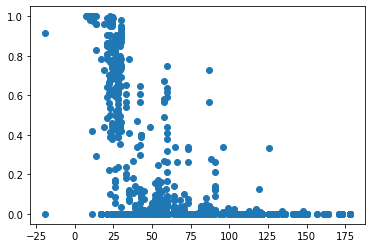

In [185]:
x = reports['Time_Since_Issue']
y = reports['Total_Dist_Percent']
plt.scatter(x, y)

By stacking each month's coupon redemption data, you will be able to generate a formula
that will tell you what percentage of the total coupon redemption
remains, and therefore how much more money should be allocated to said coupon

In [7]:
# Load Bayer Curves
# Data has media type to break into appropriate groups and run curves

all_coupons = pd.read_csv('/home/matt/DataspellProjects/mercury-ds/attribution/Bayer/bayer_curves.csv')
p0 = [1.0, .05]
print(all_coupons.nunique())
print(all_coupons['Media_Type'].value_counts())

Time_Since_Issue      232
Media_Type             20
Total_Dist_Percent    380
dtype: int64
Sunday Fsi                             1098
Paperless + Print At Home               200
Handout Checkout                        152
Paperless                                94
Handout In-Store Tearpad                 90
Handout From A Medical Location          87
Print At Home                            65
Handout Shelf Dispenser                  47
Handout In-Store                         31
In-Pack                                  22
Direct Mail                              13
Instant On-Pack Factory Applied          13
Handout With Sample                      12
On-Pack                                  12
Miscellaneous Media                      10
Paperless + Print At Home + Handout       6
Direct Mail Solo                          6
Handout In-Store Display                  4
Handout                                   2
Instant On-Pack                           1
Name: Media_Type, dtype: int6

In [ ]:
#Sunday FSI Curve, creates subset based on media type (or coupon type)
sun_fsi = all_coupons[all_coupons["Media_Type"] == "Sunday Fsi"]
np_sun_fsi = sun_fsi[['Time_Since_Issue', 'Total_Dist_Percent']].to_numpy(dtype=float)

# Takes the subset by media type and reduces it into a numpy array
# containing the Time Since Issue and Total Distribution Percent data
x = np_sun_fsi[:, 0]
y = np_sun_fsi[:, 1]

# Provides plots and estimates
print('Sunday FSI R^2 & Fit Chart')
a, b = output(x, y, p0)

In [ ]:
#@title
# Paperless Curve
paperless = all_coupons[all_coupons["Media_Type"] == "Paperless"]
np_paperless = paperless[['Time_Since_Issue',
                          'Total_Dist_Percent']].to_numpy(dtype=float)

x = np_paperless[:, 0]
y = np_paperless[:, 1]

print('Paperless R^2 & Fit Chart')
a, b = output(x, y, p0)

In [ ]:
#@title
# Paperless + Print At Home, Print at Home, Paperless + Print at Home Curve

paper_print = all_coupons[all_coupons["Media_Type"].isin(["Paperless + Print at Home",
                                                          "Print At Home",
                                                          "Paperless + Print at Home + Handout"])]

np_paper_print = paper_print[['Time_Since_Issue', 'Total_Dist_Percent']].to_numpy(dtype=float)

x = np_paper_print[:, 0]
y = np_paper_print[:, 1]

print('Paperless + Print Group R^2 & Fit Chart')
a, b = output(x, y, p0)

In [ ]:
#@title
# HANDOUT, HANDOUT IN-STORE, HANDOUT IN-STORE DISPLAY, HANDOUT IN-STORE TEARPAD,
# HANDOUT SHELF DISPENSER, HANDOUT WITH SAMPLE, INSTANT ON-PACK,
# INSTANT ON-PACK FACTORY APPLIED, ON-PACK

handout = all_coupons[all_coupons["Media_Type"].
isin(["Handout", "Handout In-Store",
      "Handout In-Store Display",
      "Handout In-Store Tearpad",
      "Handout Shelf Dispenser",
      "Handout With Samole", "Instant On-Pack",
      "On-Pack"])]

np_handout = handout[['Time_Since_Issue',
                      'Total_Dist_Percent']].to_numpy(dtype=float)

x = np_handout[:, 0]
y = np_handout[:, 1]

print('Handout Group R^2 & Fit Chart')
a, b = output(x, y, p0)

In [ ]:
#@title
# All Other: MISCELLANEOUS MEDIA, DIRECT MAIL, DIRECT MAIL SOLO

misc = all_coupons[all_coupons["Media_Type"].isin(["Miscellaneous Media",
                                                    "Direct Mail Solo",
                                                    "Direct Mail"])]

np_misc = misc[['Time_Since_Issue',
                'Total_Dist_Percent']].to_numpy(dtype=float)

x = np_misc[:, 0]
y = np_misc[:, 1]

print('All Other Group R^2 & Fit Chart')
a, b = output(x, y, p0)